# VGG-16 Model 1a
## Preprocessing method: ImageDataGenerator()
## Image size: (224, 224) 
## Images: Grayscale
## Unfrozen pretrained layers
## Image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [3]:
image_size = (224, 224)
batch_size = 64


datagen_transform = ImageDataGenerator(
    rescale =1./255,
    validation_split=.2,
    rotation_range=20,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen_val = ImageDataGenerator(
    rescale = 1./255,
)

train_ds = datagen_transform.flow_from_directory(
    path_training,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="grayscale"
)

val_ds = datagen_transform.flow_from_directory(
    path_validation,
    seed=1993,
    target_size=image_size,
    batch_size=batch_size,
    classes=['female','male'],
    shuffle=True,
    color_mode="grayscale"
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [5]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = True

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 1))
x = keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)
x = vgg_model(x)
out = keras.layers.Dense(2, activation='sigmoid')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_1 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 138,359,576
Trainable params: 138,359,576
Non-trainable params: 0
_________________________________________________________________


In [6]:
vgg16_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback])

Epoch 1/1000
735/735 [==============================] - 252s 319ms/step - loss: 0.6934 - accuracy: 0.5027 - val_loss: 0.6935 - val_accuracy: 0.4986
Epoch 2/1000
735/735 [==============================] - 225s 305ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.6949 - val_accuracy: 0.4986
Epoch 3/1000
735/735 [==============================] - 225s 306ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.6934 - val_accuracy: 0.4986
Epoch 4/1000
735/735 [==============================] - 225s 306ms/step - loss: 0.6934 - accuracy: 0.4991 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 5/1000
735/735 [==============================] - 225s 306ms/step - loss: 0.6934 - accuracy: 0.5027 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 6/1000
735/735 [==============================] - 225s 306ms/step - loss: 0.6935 - accuracy: 0.4997 - val_loss: 0.6937 - val_accuracy: 0.4986
Epoch 7/1000
735/735 [==============================] - 225s 306ms/step - loss: 0.6935 - accuracy: 0.5021 - val_

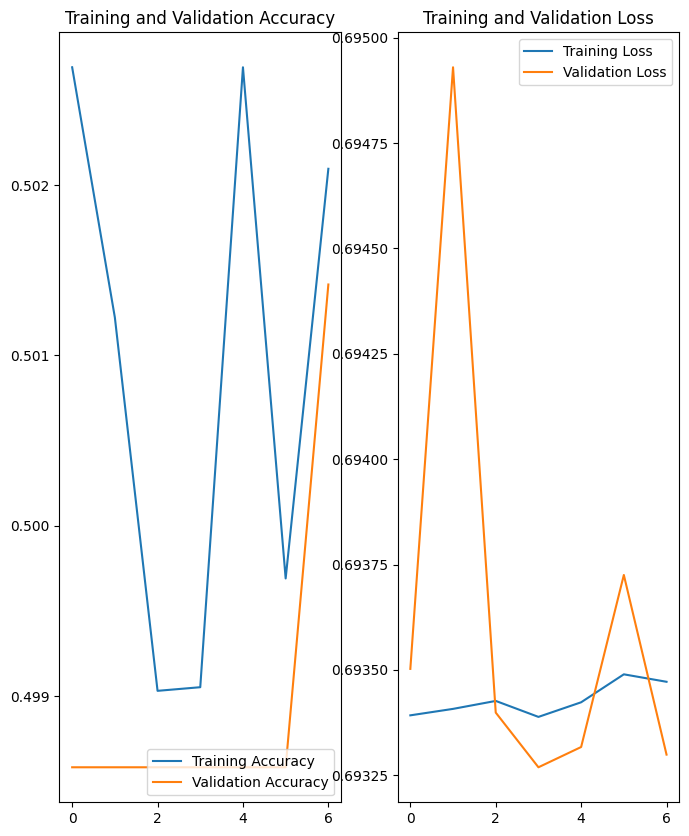

In [7]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 7)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.5027
Top Validation Accuracy: 0.5014


In [9]:
model.save("GC weights/Unfrozen/mod1a-gs/mod1a_gs_unfrozen.h5")